In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [1]:
!ls logs

ce_result_25kvocab160kit600decrnn.npy
ce_result_25kvocab160kit.npy
kld_result_npy_25kvocab160kit600decrnn.npy
kld_result_npy_25kvocab160kit.npy


In [3]:
kld = np.load('logs/kld_result_npy_25kvocab160kit600decrnn.npy')
ce = np.load('logs/ce_result_25kvocab160kit600decrnn.npy')

(0, 100)

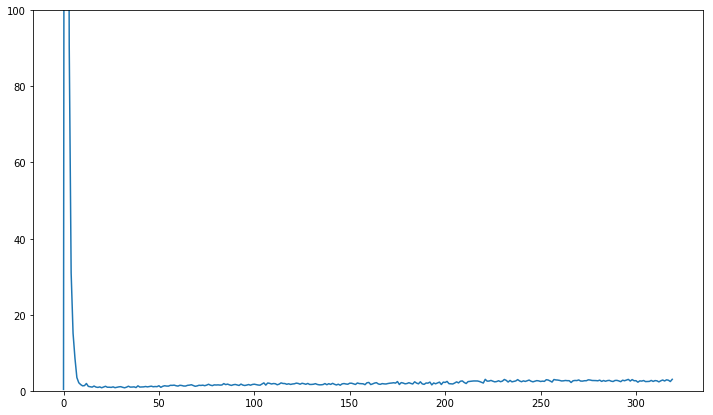

In [4]:
X = np.arange(kld.shape[0])
plt.figure(figsize=(12,7))
plt.plot(X, kld)
plt.ylim((0,100))

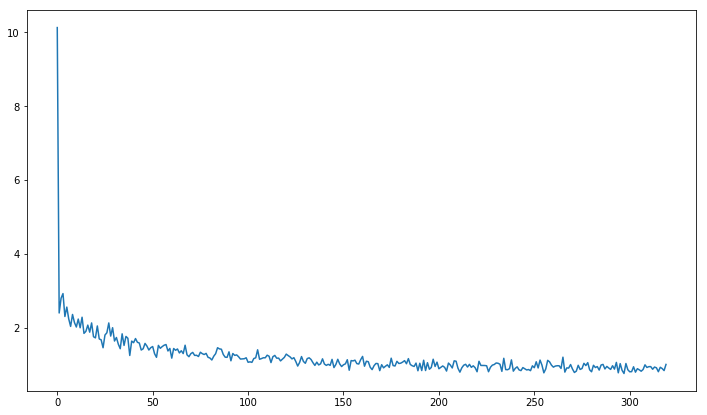

In [5]:
X = np.arange(ce.shape[0])
plt.figure(figsize=(12,7))
plt.plot(X, ce)

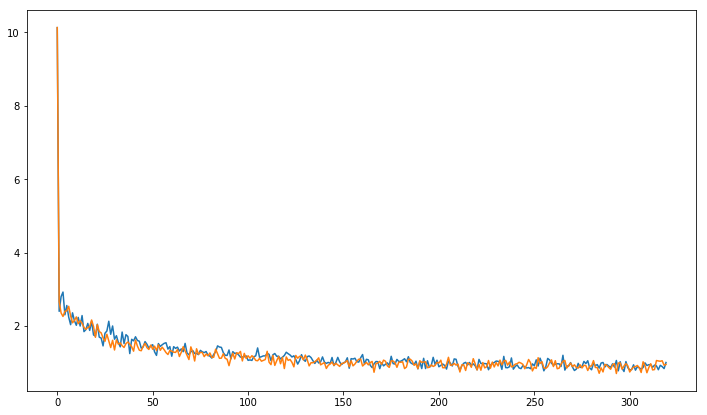

In [11]:
ce1 = np.load('logs/ce_result_25kvocab160kit600decrnn.npy')
ce2 = np.load('logs/ce_result_25kvocab160kit.npy')
X = np.arange(ce1.shape[0])
plt.figure(figsize=(12,7))
plt.plot(X, ce1)
plt.plot(X, ce2)


In [10]:
np.min(ce[-100:])

0.75627357